In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from os import path
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter, LogFormatterMathtext

In [15]:
from tools import FixedOrderFormatter, get_psycinfo_database, GetTemporalPsyc

In [3]:
%matplotlib inline

In [28]:
df = pd.DataFrame.from_csv("data/PsycInfo/PsycInfo Articles Review.csv")
df.set_index(df.index.year, inplace=True)

In [46]:
terms = GetTemporalPsyc()

In [55]:
len(df), len(terms)

(166, 95)

In [57]:
terms["Prob"]  = terms.fillna(0).sum(axis=1)
terms["Count"]  = terms["Prob"].values * df.loc[terms.index].values.flatten()

In [5]:
x = df.index.year
y = df.values

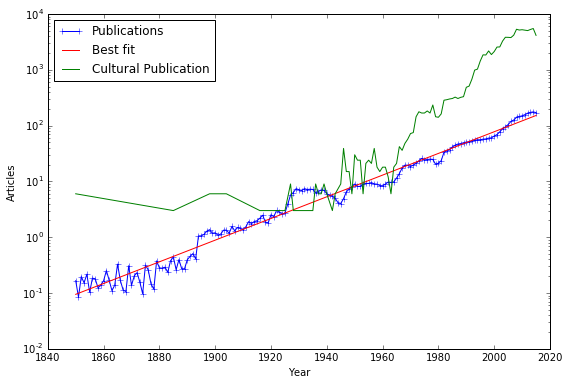

In [67]:
y_ = np.log10(y)
m, b = np.polyfit(x, y_, 1)
fig = plt.figure(figsize=(9.0, 6.0))
ax = fig.add_subplot(1,1,1)
_ = plt.plot(x, y,  marker='+', label="Publications")
_ = plt.plot(x, 10**(m*x + b), 'r-', label="Best fit")
plt.plot(terms.index, terms.Count, label="Cultural Publication")

ax.set_yscale('log')
ax.yaxis.set_major_formatter(LogFormatterMathtext())
ax.set_ylabel("Articles")
_ = ax.set_xlabel("Year")
plt.tick_params(axis='y', which='minor', labelsize=7)
_ = ax.legend(loc="upper left")

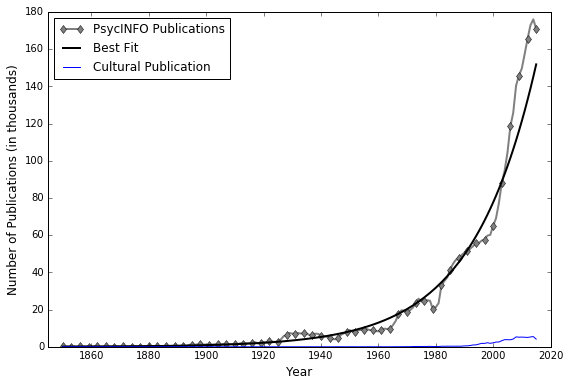

In [69]:
fig = plt.figure(figsize=(9.0, 6.0))
ax = fig.add_subplot(1,1,1)
font = {'family': "Times New Roman",
            'color': 'black',
           'size': 12}
y = df.values / 1000.0
_ = plt.plot(x, y,  marker = 'd', markevery =3, linewidth = 2, label="PsycINFO Publications", color = 'gray')
y_ = np.log10(y)
m, b = np.polyfit(x, y_, 1)
_ = plt.plot(x, 10**(m*x + b), 'r-', linewidth = 2, label="Best Fit", color = 'black')
ax.set_ylabel("Number of Publications (in thousands)", font)
_ = ax.set_xlabel("Year", font)
plt.tick_params(axis='y', which='minor', labelsize=7)
plt.plot(terms.index, terms.Count/1000.0, label="Cultural Publication")
_ = ax.legend(loc='best')
_ = plt.xlim(1845, 2020)

In [70]:
y_ = np.log2(y)
m, b = np.polyfit(x, y_, 1)
print("2**({}*x+{})".format(m[0], b[0]))

2**(0.0645340333298945*x+-122.78967827164473)


In [71]:
1.0/m

array([ 15.49569969])


y = $2^{\frac{13x}{200} - 122.79}  $ 

every 15.50 years or 15 years and 6 months, publications double. 